In [1]:
import hashlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [2]:
image_path = 'itachi1.jpg'
image = Image.open(image_path)

In [3]:
#Generating SHA-256 
def sha256_hash(image_path):
    """ Generate SHA-256 hash of the image file. """
    hash_sha256 = hashlib.sha256()
    with open(image_path, "rb") as image_file:
        hash_sha256.update(image_file.read())
    return hash_sha256.hexdigest()

In [4]:
#Split the hash_value into 2-character blocks and convert to integers
def convert_hash_to_integers(hash_value, block_size=2):
 return [int(hash_value[i:i+block_size], 16) for i in range(0, len(hash_value), block_size)]

In [5]:
image_hash = sha256_hash(image_path)
hash_blocks = convert_hash_to_integers(image_hash)
print("The SHA_256 hash valjue of the image is:",image_hash)
print("The original 256-bit SHA-256 hash is transformed into 32 blocks:",hash_blocks)

The SHA_256 hash valjue of the image is: 438a8fa0f63ff604259d18cb1ccf4f8ee65548b75c1ce005d37890f2027ccaa2
The original 256-bit SHA-256 hash is transformed into 32 blocks: [67, 138, 143, 160, 246, 63, 246, 4, 37, 157, 24, 203, 28, 207, 79, 142, 230, 85, 72, 183, 92, 28, 224, 5, 211, 120, 144, 242, 2, 124, 202, 162]


In [6]:
# Generate external keys (c_values)

external_keys = [1,2,3,4,5,6]


In [7]:
def calculate_intermediate_params(c_values, k_values):
    # Convert hexadecimal strings to integers
   # k_values = [int(k, 16) for k in k_values]
    h1 = (c_values[0] + (k_values[0] ^ k_values[1] ^ k_values[2] ^ k_values[3] ^ k_values[4])) / 256
    h2 = (c_values[1] + (k_values[5] ^ k_values[6] ^ k_values[7] ^ k_values[8] ^ k_values[9])) / 256
    h3 = (c_values[2] + (k_values[10] ^ k_values[11] ^ k_values[12] ^ k_values[13] ^ k_values[14])) / 256
    h4 = (c_values[3] + (k_values[15] ^ k_values[16] ^ k_values[17] ^ k_values[18] ^ k_values[19])) / 256
    h5 = (c_values[4] + (k_values[20] ^ k_values[21] ^ k_values[22] ^ k_values[23] ^ k_values[24] ^ k_values[25])) / 256
    h6 = (c_values[5] + (k_values[26] ^ k_values[27] ^ k_values[28] ^ k_values[29] ^ k_values[30] ^ k_values[31])) / 256

    return h1, h2, h3, h4, h5, h6

In [8]:
# Calculate intermediate parameters h1 to h6
h1, h2, h3, h4, h5, h6 = calculate_intermediate_params(external_keys, hash_blocks)
# Output the intermediate parameters
print("Intermediate Parameters h1 to h6:", h1, h2, h3, h4, h5, h6)



Intermediate Parameters h1 to h6: 0.06640625 0.46484375 0.3203125 0.7734375 0.07421875 0.4765625


In [9]:
# Function to calculate chaotic system initial values
def calculate_initial_values(h1, h2, h3, h4, h5, h6):
    x0 = ((h1 + h2 + h5) * 10**8) % 256 / 255
    y0 = ((h3 + h4 + h6) * 10**8) % 256 / 255
    z0 = ((h1 + h2 + h3 + h4) * 10**8) % 256 / 255
    p0 = ((h1 + h2 + h3) * 10**8) % 256 / 255
    q0 = ((h4 + h6 + h5) * 10**8) % 256 / 255

    return x0, y0, z0, p0, q0
x0,y0,z0,p0,q0=calculate_initial_values(h1,h2,h3,h4,h5,h6)
print("Inital Values:" ,x0,y0,z0,p0,q0)



Inital Values: 0.23137254901960785 0.3215686274509804 0.6274509803921569 0.6039215686274509 0.9529411764705882


In [10]:
# Function to calculate chaotic system parameters a, b, c, d
def calculate_chaotic_system_parameters(h1, h2, h3, h4, h5, h6):
    
    a = (h1 + h2 / (h1 + h2 + h3 + h4 + h5 + h6)) * 100 % 3 + 1
    b = (h3 + h4 / (h1 + h2 + h3 + h4 + h5 + h6)) * 100 % 3 + 1
    c = (h5 + h6 / (h1 + h2 + h3 + h4 + h5 + h6)) * 100 % 3 + 1
    d = (h1 + h2 + h3 / (h1 + h2 + h3 + h4 + h5 + h6)) % 1

    return a, b, c, d
a,b,c,d=calculate_chaotic_system_parameters(h1,h2,h3,h4,h5,h6)
print("Four Parameters:" , a,b,c,d)


Four Parameters: 2.0050774236983884 2.5788263016158055 3.3249270646319573 0.6784672351885099


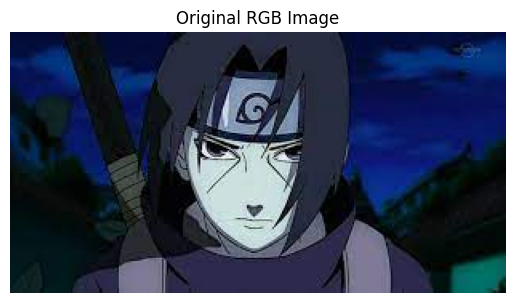

In [11]:
#Show the original image
plt.imshow(image)
plt.title('Original RGB Image')
plt.axis('off')
plt.show()

In [12]:
# Convert to numpy array and then to 8-bit binary
rgb_array = np.array(image)
print(rgb_array)

[[[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0  9 62]
  [ 0  9 62]
  [ 0  8 61]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 11 65]
  [ 0 10 64]
  [ 0 10 64]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 15 70]
  [ 0 14 69]
  [ 0 14 69]]

 ...

 [[11 32 33]
  [11 32 33]
  [12 33 34]
  ...
  [ 0 14  8]
  [ 0 15 12]
  [ 3 24 19]]

 [[12 32 31]
  [12 32 31]
  [13 33 32]
  ...
  [ 0  9  7]
  [ 0 11 10]
  [ 2 18 17]]

 [[12 32 31]
  [12 32 31]
  [13 33 32]
  ...
  [ 0  7  5]
  [ 0  9  8]
  [ 0 14 13]]]


In [13]:
# Assuming rgb_array is your RGB array
# Create bit planes for each channel
bit_planes = np.unpackbits(rgb_array, axis=-1)

# Reshape the bit planes to form a 4D array with dimensions (height, width, channels=3, 8)
bit_planes_4d = bit_planes.reshape(rgb_array.shape + (8,))

# Print the shape of the 4D array and a small part of the array
print("Shape of the 4D array:", bit_planes_4d.shape)
print("Small section of the array:")
print(bit_planes_4d)

Shape of the 4D array: (163, 310, 3, 8)
Small section of the array:
[[[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   [0 0 1 ... 1 1 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   [0 0 1 ... 1 1 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 1 ... 1 0 1]]]


 [[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 1]
   [0 1 0 ... 0 0 1]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 0]
   [0 1 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 0]
   [0 1 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[

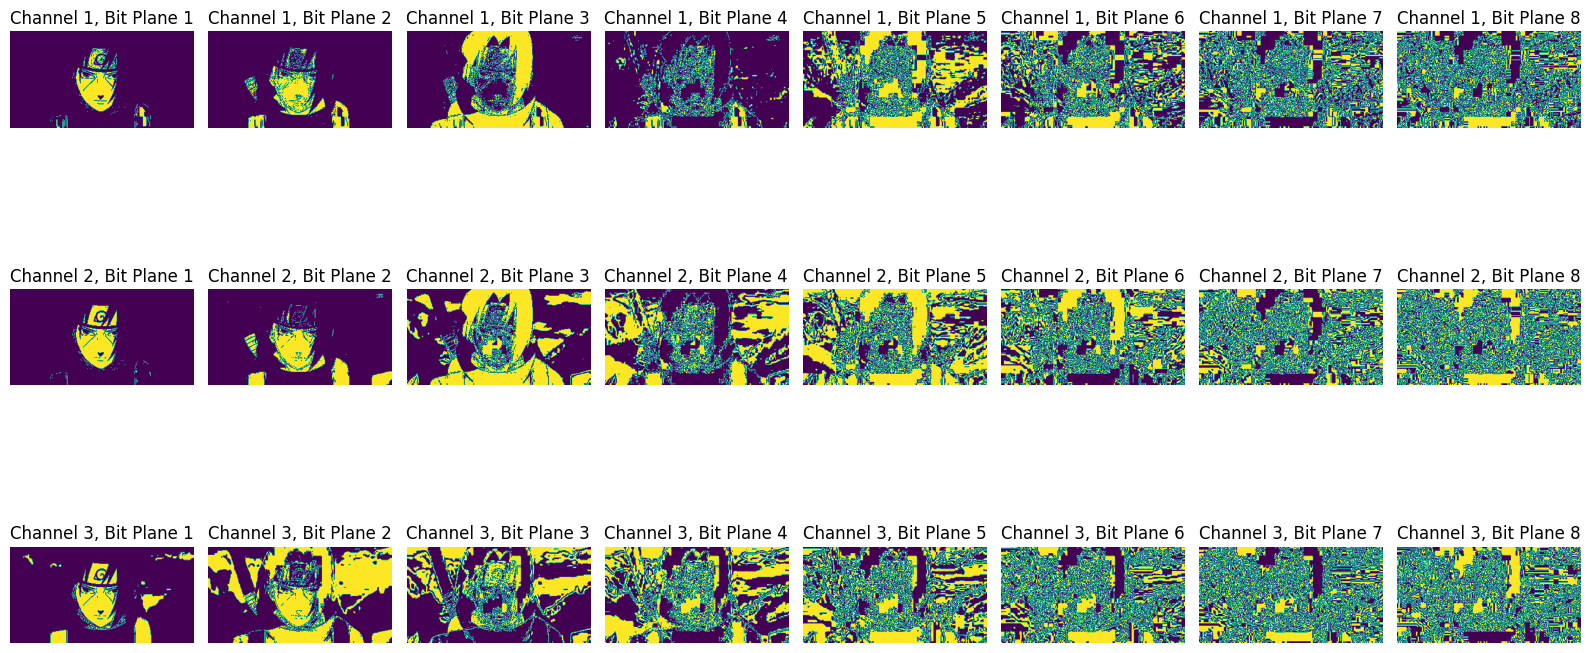

In [14]:
fig, axes = plt.subplots(3, 8, figsize=(16, 9))

for i in range(3):  # Iterate over each channel
    for j in range(8):  # Iterate over each bit plane
        ax = axes[i, j]
        ax.imshow(bit_planes_4d[:, :, i, j])
        ax.set_title(f'Channel {i+1}, Bit Plane {j+1}')
        ax.axis('off')

plt.tight_layout()
plt.show()


In [15]:
def generate_sequences_3d_sine_chaos(x0, y0, z0, a, b, c, u):  
  iterations = 1000 + u  # Total number of iterations
  
  X1 = []
  X2 = []
  X3 = []
  
  # Initialize x, y, z with the initial values x0, y0, z0
  x = x0
  y = y0
  z = z0
  
  # Iterate the 3D Sine chaos system
  for i in range(iterations):
      # Add a check to avoid division by zero
      den_x = np.sin(np.pi * y * (1 - z))
      den_y = np.sin(np.pi * z * (1 - x))
      den_z = np.sin(np.pi * x * (1 - y))
      if den_y == 0 or den_z == 0:
        continue
      xi = (a**3 * np.sin(np.pi * x * (1 - y)) / den_x) % 1
      yi = (b**3 * np.sin(np.pi * y * (1 - z)) / den_y) % 1
      zi = (c**3 * np.sin(np.pi * z * (1 - x)) / den_z) % 1
  
      # Discard the first 1000 iterations
      if i >= 1000:
          X1.append(xi)
          X2.append(yi)
          X3.append(zi)
  
      # Update x, y, z for the next iteration
      x, y, z = xi, yi, zi
  return X1,X2,X3

In [16]:
u=bit_planes_4d.shape[0] * bit_planes_4d.shape[1] *3
print(u)
''''''
X1, X2, X3= generate_sequences_3d_sine_chaos(x0, y0, z0, a, b, c, u)
print("Generated Sequences X1, X2, X3:")
print(X1[:10])
print(X2[:10])
print(X3[:10])

151590
Generated Sequences X1, X2, X3:
[0.7462160456867011, 0.5186969446136391, 0.2148022747377989, 0.03369831260692724, 0.7527652332336212, 0.1528656816997227, 0.1935640942781447, 0.2571525327987274, 0.9965040254992151, 0.6878218355759955]
[0.6822277351707555, 0.8593260693105691, 0.32390042032189115, 0.35190078471366704, 0.05209073859035129, 0.18813606783625245, 0.18355712513534606, 0.8759592323749763, 0.8883645311017627, 0.018290785296812828]
[0.33229197378980935, 0.19701711183051174, 0.47982851113123814, 0.25426337391756704, 0.9547229755710305, 0.6968797121931836, 0.8383737228046328, 0.657363027641594, 0.17738022173745094, 0.20912956722369996]


In [17]:
def scramble_matrix(matrix_3d, x1, x2, x3):
    u = matrix_3d.shape[-1]  # Number of planes
    
    # Scrambling the Z-bit plane
    s1 = np.argsort(x1)
    t1 = np.mod(s1, matrix_3d.shape[0])
    pz1 = np.zeros_like(matrix_3d)
    for i in range(u):
        pz1[..., i] = matrix_3d[t1[i], ..., i]

    # Scrambling the Y-bit plane
    s2 = np.argsort(x2)
    t2 = np.mod(s2, matrix_3d.shape[1])
    py3 = np.zeros_like(matrix_3d)
    for i in range(u):
        py3[:, i, :] = pz1[:, t2[i], :]

    # Scrambling the X-bit plane
    s3 = np.argsort(x3)
    t3 = np.mod(s3, matrix_3d.shape[2])
    px5 = np.zeros_like(matrix_3d)
    for i in range(u):
        px5[i, ...] = py3[i, ..., np.newaxis, t3[i]]  # Add np.newaxis to ensure proper broadcasting

    p6 = px5

    return p6



In [18]:
'''
scrambled_matrix = scramble_matrix(bit_planes_4d ,X1,X2,X3)
print("Scrambled Matrix: ",scrambled_matrix)
width, height, depth = scrambled_matrix.shape
print("Width: ",width," Height: ",height," Depth: ",depth)
'''

'\nscrambled_matrix = scramble_matrix(bit_planes_4d ,X1,X2,X3)\nprint("Scrambled Matrix: ",scrambled_matrix)\nwidth, height, depth = scrambled_matrix.shape\nprint("Width: ",width," Height: ",height," Depth: ",depth)\n'

In [19]:
# Shuffle the binary values in the 3D matrix
shuffled_bit_planes_4d = 1 - bit_planes_4d

# Print the shape of the shuffled 3D array and a small part of the array
print("Shape of the shuffled 3D array:", shuffled_bit_planes_4d.shape)
print("Small section of the shuffled array:")
print(shuffled_bit_planes_4d) 

Shape of the shuffled 3D array: (163, 310, 3, 8)
Small section of the shuffled array:
[[[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  ...

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 0]
   [1 1 0 ... 0 0 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 0]
   [1 1 0 ... 0 0 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 1]
   [1 1 0 ... 0 1 0]]]


 [[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  ...

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 0]
   [1 0 1 ... 1 1 0]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 1]
   [1 0 1 ... 1 1 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 1]
   [1 0 1 ... 1 1 1]]]


 [[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0

In [20]:
def dna_encoding_rules(rule_index):
       encoding_rules = {
           1: {'00': 'A', '11': 'T', '01': 'C', '10': 'G'},
           2: {'00': 'A', '11': 'T', '10': 'C', '01': 'G'},
           3: {'01': 'A', '10': 'T', '00': 'C', '11': 'G'},
           4: {'01': 'A', '10': 'T', '11': 'C', '00': 'G'},
           5: {'10': 'A', '01': 'T', '00': 'C', '11': 'G'},
           6: {'10': 'A', '01': 'T', '11': 'C', '00': 'G'},
           7: {'11': 'A', '00': 'T', '01': 'C', '10': 'G'},
           8: {'11': 'A', '00': 'T', '10': 'C', '01': 'G'},
        } 
       return encoding_rules[rule_index]
   
def dna_encoding(p6):
    u, v, channels, w = p6.shape

    encoded_dna = np.empty((u, v, channels, w//2), dtype='U1')
    for i in range(u):
        #l_i = np.mod(np.sum(p6[i]), 8) + 1  # Calculate L(i)
        l_i=1
        encoding_rule = dna_encoding_rules(l_i)
        for j in range(v):
          for c in range(channels):
            for k in range(0, w, 2):
                 value1 = p6[i, j, c, k]
                 value2 = p6[i, j, c, k + 1]
                 pair = f"{value1}{value2}"  # Combine two values into one pair
                 encoded_dna[i, j, c, k // 2] = encoding_rule[pair]

    return encoded_dna

In [21]:
encoded_matrix = dna_encoding(shuffled_bit_planes_4d)
print("Encoded Matrix: ",encoded_matrix)
print(encoded_matrix.shape)

Encoded Matrix:  [[[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  ...

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'G']
   ['T' 'A' 'A' 'C']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'G']
   ['T' 'A' 'A' 'C']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'T']
   ['T' 'A' 'A' 'G']]]


 [[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  ...

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'A']
   ['G' 'T' 'T' 'G']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'C']
   ['G' 'T' 'T' 'T']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'C']
   ['G' 'T' 'T' 'T']]]


 [[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' '

In [22]:
transcription_table = {
    'A': 'U',
    'T': 'A',
    'C': 'G',
    'G': 'C'
}

def dna_transcription(p7):
    # Apply the transcription rules using vectorization
    p8 = np.vectorize(transcription_table.get)(p7)

    return p8

In [23]:
dna_transcription_matrix = dna_transcription(encoded_matrix)
print("Transcription of the encoded matrix :",dna_transcription_matrix)
print(dna_transcription_matrix.shape)


Transcription of the encoded matrix : [[[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  ...

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'C']
   ['A' 'U' 'U' 'G']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'C']
   ['A' 'U' 'U' 'G']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'A']
   ['A' 'U' 'U' 'C']]]


 [[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  ...

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'U']
   ['C' 'A' 'A' 'C']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'G']
   ['C' 'A' 'A' 'A']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'G']
   ['C' 'A' 'A' 'A']]]


 [[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' '

In [24]:
def generate_sequences(p0, q0, d, u):
    Y = []
    Z = []
    p=p0
    q=q0
    for i in range(u*4):
        p1 = np.sin(np.pi * d * (q + 3) * p * (1 - p))
        q1 = np.sin(np.pi * d * (p + 3) * q * (1 - q))
        Y.append(p1)
        p = p1
        
        Z.append(q1)
        q = q1
       
        
    return Y
Y= generate_sequences(p0,q0,d,u)
print("Sequence Y:", Y[:10])



Sequence Y: [0.9027820282497848, 0.5846027683411433, 0.8878850269687821, 0.6444423590874152, 0.9302672129143988, 0.41708521281018984, 0.9336097668685962, 0.5026772410385838, 0.9962661150486529, 0.029080205775967472]


In [25]:
def mutation_rules():
    return {
        0: {'A': 'A', 'U': 'U', 'G': 'G', 'C': 'C'},
        1: {'A': 'U', 'U': 'A', 'G': 'C', 'C': 'G'},
        2: {'A': 'G', 'U': 'C', 'G': 'A', 'C': 'U'},
        3: {'A': 'C', 'U': 'G', 'G': 'U', 'C': 'A'}
    }

def rna_mutation(p8, Y):
    u, v, channels, w = p8.shape
    # Reshape Y to match the shape of p8
    Y_reshaped = Y.reshape((u, v,channels, w))
    
    p9 = np.empty_like(p8, dtype='U1')

    # Convert Y2 to integer Y1
    Y1 = np.floor(np.mod(Y_reshaped * 10**5, 4)).astype(int)

    mutation_rules_dict = mutation_rules()

    # Use vectorized operations for efficient mutation
    mutation_func = np.vectorize(lambda mode, base: mutation_rules_dict[mode].get(base, base))
    p9 = mutation_func(Y1, p8)

    return p9    

In [26]:

rna_mutation_matrix = rna_mutation(dna_transcription_matrix, np.array(Y))
print("Rna mutation :")
print(rna_mutation_matrix)
print(rna_mutation_matrix.shape)

Rna mutation :
[[[['G' 'A' 'A' 'U']
   ['G' 'A' 'G' 'U']
   ['G' 'U' 'A' 'A']]

  [['G' 'U' 'A' 'G']
   ['U' 'U' 'U' 'U']
   ['U' 'A' 'U' 'C']]

  [['A' 'C' 'G' 'G']
   ['U' 'G' 'C' 'C']
   ['A' 'A' 'G' 'U']]

  ...

  [['A' 'U' 'C' 'C']
   ['G' 'U' 'A' 'U']
   ['U' 'C' 'U' 'A']]

  [['U' 'G' 'A' 'A']
   ['C' 'U' 'A' 'G']
   ['C' 'G' 'G' 'G']]

  [['C' 'C' 'A' 'A']
   ['A' 'G' 'U' 'U']
   ['C' 'U' 'G' 'U']]]


 [[['C' 'G' 'U' 'U']
   ['G' 'A' 'A' 'C']
   ['G' 'U' 'G' 'U']]

  [['A' 'A' 'A' 'G']
   ['C' 'G' 'C' 'A']
   ['G' 'C' 'A' 'C']]

  [['U' 'U' 'C' 'G']
   ['A' 'U' 'C' 'C']
   ['U' 'G' 'U' 'U']]

  ...

  [['U' 'G' 'A' 'C']
   ['C' 'G' 'U' 'C']
   ['U' 'G' 'U' 'C']]

  [['A' 'C' 'G' 'C']
   ['G' 'A' 'G' 'G']
   ['G' 'A' 'U' 'A']]

  [['C' 'A' 'C' 'U']
   ['A' 'A' 'G' 'U']
   ['C' 'U' 'C' 'G']]]


 [[['C' 'A' 'G' 'G']
   ['U' 'C' 'C' 'G']
   ['C' 'U' 'A' 'U']]

  [['C' 'G' 'C' 'A']
   ['G' 'C' 'A' 'U']
   ['U' 'U' 'C' 'G']]

  [['C' 'U' 'A' 'A']
   ['A' 'U' 'U' 'G']
   ['G' 'C' 'A'

In [27]:
def translation_rules():
    return {
        'A': 'U',
        'U': 'A',
        'C': 'G',
        'G': 'C'
    }


def rna_translation(p9):
    translation_rules_dict = translation_rules()

    # Use vectorized operations for efficient translation
    translation_func = np.vectorize(lambda base: translation_rules_dict[base])
    p10 = translation_func(p9)

    return p10

In [28]:
rna_translation_matrix = rna_translation(rna_mutation_matrix)
print("The Translation matrix is:")
print(rna_translation_matrix)
print(rna_translation_matrix.shape)

The Translation matrix is:
[[[['C' 'U' 'U' 'A']
   ['C' 'U' 'C' 'A']
   ['C' 'A' 'U' 'U']]

  [['C' 'A' 'U' 'C']
   ['A' 'A' 'A' 'A']
   ['A' 'U' 'A' 'G']]

  [['U' 'G' 'C' 'C']
   ['A' 'C' 'G' 'G']
   ['U' 'U' 'C' 'A']]

  ...

  [['U' 'A' 'G' 'G']
   ['C' 'A' 'U' 'A']
   ['A' 'G' 'A' 'U']]

  [['A' 'C' 'U' 'U']
   ['G' 'A' 'U' 'C']
   ['G' 'C' 'C' 'C']]

  [['G' 'G' 'U' 'U']
   ['U' 'C' 'A' 'A']
   ['G' 'A' 'C' 'A']]]


 [[['G' 'C' 'A' 'A']
   ['C' 'U' 'U' 'G']
   ['C' 'A' 'C' 'A']]

  [['U' 'U' 'U' 'C']
   ['G' 'C' 'G' 'U']
   ['C' 'G' 'U' 'G']]

  [['A' 'A' 'G' 'C']
   ['U' 'A' 'G' 'G']
   ['A' 'C' 'A' 'A']]

  ...

  [['A' 'C' 'U' 'G']
   ['G' 'C' 'A' 'G']
   ['A' 'C' 'A' 'G']]

  [['U' 'G' 'C' 'G']
   ['C' 'U' 'C' 'C']
   ['C' 'U' 'A' 'U']]

  [['G' 'U' 'G' 'A']
   ['U' 'U' 'C' 'A']
   ['G' 'A' 'G' 'C']]]


 [[['G' 'U' 'C' 'C']
   ['A' 'G' 'G' 'C']
   ['G' 'A' 'U' 'A']]

  [['G' 'C' 'G' 'U']
   ['C' 'G' 'U' 'A']
   ['A' 'A' 'G' 'C']]

  [['G' 'A' 'U' 'U']
   ['U' 'A' 'A' 'C']
   

In [29]:
def generate_sequences(p0, q0, d, u):
    Y = []
    Z1 = []
    Z=[]
    p=p0
    q=q0
    for i in range(u*4):
        p1 = np.sin(np.pi * d * (q + 3) * p * (1 - p))
        q1 = np.sin(np.pi * d * (p + 3) * q * (1 - q))
        Y.append(p1)
        p = p1
        Z1.append(q1)
        q = q1
       
    for i in range(u):
        Z.append(Z1[i]) 
    return Z
Z= generate_sequences(p0,q0,d,u)

print("Sequence Z:",Z[:10])
print(len(Z))
Z = np.array(Z)

Sequence Z: [0.3377052037424545, 0.9583133068394294, 0.30051090006992953, 0.985390527766763, 0.11159562870722624, 0.738293306270137, 0.9866598096648945, 0.11013303613882419, 0.6681210683106208, 0.9498859383121093]
151590


In [30]:
# Transform Z into the range of 0-255
Z_prime = np.floor(np.mod(Z * 10**5, 256)).astype(np.uint8)
print(Z_prime)
# Reshape Z_prime into a 2D array
Z_reshaped = Z_prime.reshape(rna_translation_matrix.shape[0], rna_translation_matrix.shape[1],rna_translation_matrix.shape[2])
print(Z_reshaped.shape)
# Create bit planes
rna_bit_planes = np.unpackbits(np.expand_dims(Z_reshaped, axis=-1), axis=-1)
# Reshape the bit planes to form a 3D array
rna_bit_planes_4d = rna_bit_planes.reshape(Z_reshaped.shape + (8,))

# Print the shape of the 3D array and a small part of the array
print("Shape of the 4D array:", rna_bit_planes_4d.shape)
print("Small section of the array:")
print(rna_bit_planes_4d)

[234  87  99 ...  89 244 172]
(163, 310, 3)
Shape of the 4D array: (163, 310, 3, 8)
Small section of the array:
[[[[1 1 1 ... 0 1 0]
   [0 1 0 ... 1 1 1]
   [0 1 1 ... 0 1 1]]

  [[1 1 1 ... 0 1 1]
   [1 0 0 ... 1 1 1]
   [0 1 1 ... 1 0 1]]

  [[0 1 1 ... 0 0 1]
   [0 0 0 ... 1 0 1]
   [1 1 1 ... 1 0 0]]

  ...

  [[0 0 1 ... 0 1 1]
   [1 0 0 ... 1 1 0]
   [0 0 0 ... 0 0 0]]

  [[0 1 0 ... 1 0 1]
   [1 1 1 ... 1 0 0]
   [0 1 0 ... 1 0 0]]

  [[0 0 1 ... 1 0 1]
   [0 0 0 ... 0 1 1]
   [1 1 1 ... 0 1 0]]]


 [[[1 1 1 ... 0 1 0]
   [1 1 1 ... 1 0 0]
   [1 1 0 ... 0 1 1]]

  [[0 1 1 ... 1 0 0]
   [0 1 1 ... 0 1 1]
   [0 0 1 ... 1 0 0]]

  [[1 0 0 ... 0 1 1]
   [0 1 0 ... 1 0 1]
   [0 1 1 ... 0 0 0]]

  ...

  [[1 1 1 ... 1 0 1]
   [0 0 1 ... 1 1 0]
   [1 0 1 ... 0 1 1]]

  [[0 0 1 ... 1 1 1]
   [1 0 0 ... 0 1 1]
   [1 1 1 ... 0 0 0]]

  [[0 1 0 ... 0 1 0]
   [0 1 1 ... 1 0 0]
   [0 0 0 ... 1 1 0]]]


 [[[1 0 1 ... 0 1 1]
   [0 0 0 ... 1 0 1]
   [0 1 0 ... 0 0 0]]

  [[1 1 0 ... 1 0 0]
   [

In [31]:
def rna_encoding(Z, p10, u):
    # Transform Z into the range of 0-255
    Z_prime = np.floor(np.mod(Z * 10**5, 256)).astype(np.uint8)

    # Reshape Z_prime into a 2D array
    Z_reshaped = Z_prime.reshape(p10.shape[0], p10.shape[1],p10.shape[2])

    # Create bit planes
    rna_bit_planes = np.unpackbits(np.expand_dims(Z_reshaped, axis=-1), axis=-1)
    # Reshape the bit planes to form a 3D array
    rna_bit_planes_4d = rna_bit_planes.reshape(Z_reshaped.shape + (8,))

    # Apply encoding rules
    encoding_rules = {
        '00': 'A',
        '11': 'U',
        '01': 'C',
        '10': 'G'
    }
   # Initialize a 3D array to store the RNA sequence with the desired shape
    rna_sequence_4d = np.empty((rna_bit_planes_4d.shape[0], rna_bit_planes_4d.shape[1],rna_bit_planes_4d.shape[2], 4), dtype='U1')

    # Iterate through the 3D array
    for i in range(rna_bit_planes_4d.shape[0]):
        for j in range(rna_bit_planes_4d.shape[1]):
             for c in range(rna_bit_planes_4d.shape[2]):
              # Pair 2-bits and apply encoding rules
               for k in range(0, rna_bit_planes_4d.shape[3], 2):
                bit_pair = ''.join(map(str, rna_bit_planes_4d[i, j, c, k:k+2]))
                rna_sequence_4d[i, j, c, k:k+2] = list(encoding_rules[bit_pair])

    return rna_sequence_4d
    

In [32]:
encoded_array = rna_encoding(np.array(Z),rna_translation_matrix,u)
print("Encoding matrix: ")
print(encoded_array)
print(encoded_array.shape)

Encoding matrix: 
[[[['U' 'U' 'G' 'G']
   ['C' 'C' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  [['U' 'U' 'G' 'G']
   ['G' 'G' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  [['C' 'C' 'G' 'G']
   ['A' 'A' 'A' 'A']
   ['U' 'U' 'U' 'U']]

  ...

  [['A' 'A' 'U' 'U']
   ['G' 'G' 'C' 'C']
   ['A' 'A' 'A' 'A']]

  [['C' 'C' 'A' 'A']
   ['U' 'U' 'G' 'G']
   ['C' 'C' 'A' 'A']]

  [['A' 'A' 'U' 'U']
   ['A' 'A' 'C' 'C']
   ['U' 'U' 'G' 'G']]]


 [[['U' 'U' 'G' 'G']
   ['U' 'U' 'G' 'G']
   ['U' 'U' 'A' 'A']]

  [['C' 'C' 'U' 'U']
   ['C' 'C' 'G' 'G']
   ['A' 'A' 'U' 'U']]

  [['G' 'G' 'A' 'A']
   ['C' 'C' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  ...

  [['U' 'U' 'G' 'G']
   ['A' 'A' 'U' 'U']
   ['G' 'G' 'G' 'G']]

  [['A' 'A' 'G' 'G']
   ['G' 'G' 'C' 'C']
   ['U' 'U' 'U' 'U']]

  [['C' 'C' 'C' 'C']
   ['C' 'C' 'U' 'U']
   ['A' 'A' 'A' 'A']]]


 [[['G' 'G' 'G' 'G']
   ['A' 'A' 'A' 'A']
   ['C' 'C' 'A' 'A']]

  [['U' 'U' 'A' 'A']
   ['C' 'C' 'C' 'C']
   ['U' 'U' 'U' 'U']]

  [['U' 'U' 'U' 'U']
   ['C' 'C' 'C' 'C']
   ['A' 'A' 

In [33]:
# XOR Truth Table for RNA computing
xor_truth_table = {
    'A': {'A': 'A', 'U': 'U', 'C': 'C', 'G': 'G'},
    'U': {'A': 'U', 'U': 'A', 'C': 'G', 'G': 'C'},
    'C': {'A': 'C', 'U': 'G', 'C': 'A', 'G': 'U'},
    'G': {'A': 'G', 'U': 'C', 'C': 'U', 'G': 'A'}
}

def rna_computing(encoded_array, p10):
    # Assuming the first value of P11 is the same as the encoded array
    P11 = np.zeros_like(p10, dtype=np.object_)
    #P11[0] = encoded_array[0]

    u = P11.shape[0]

    for j in range(0, u):
        # Vectorized XOR operation using the truth table
        P11[j] = np.vectorize(lambda x, y: xor_truth_table[x][y])(encoded_array[j], p10[j])

    return P11

In [34]:
rna_computing_matrix = rna_computing(encoded_array,rna_translation_matrix)
print("Rna computation: ",rna_computing_matrix)
print(rna_computing_matrix.shape)

Rna computation:  [[[['G' 'A' 'C' 'G']
   ['A' 'G' 'A' 'C']
   ['A' 'C' 'C' 'C']]

  [['G' 'U' 'C' 'U']
   ['G' 'G' 'C' 'C']
   ['C' 'G' 'G' 'A']]

  [['G' 'U' 'U' 'U']
   ['A' 'C' 'G' 'G']
   ['A' 'A' 'G' 'U']]

  ...

  [['U' 'A' 'C' 'C']
   ['U' 'G' 'G' 'C']
   ['A' 'G' 'A' 'U']]

  [['C' 'A' 'U' 'U']
   ['C' 'U' 'C' 'U']
   ['U' 'A' 'C' 'C']]

  [['G' 'G' 'A' 'A']
   ['U' 'C' 'C' 'C']
   ['C' 'U' 'U' 'G']]]


 [[['C' 'G' 'G' 'G']
   ['G' 'A' 'C' 'A']
   ['G' 'U' 'C' 'A']]

  [['G' 'G' 'A' 'G']
   ['U' 'A' 'A' 'C']
   ['C' 'G' 'A' 'C']]

  [['G' 'G' 'G' 'C']
   ['G' 'C' 'U' 'U']
   ['C' 'A' 'G' 'G']]

  ...

  [['U' 'G' 'C' 'A']
   ['G' 'C' 'U' 'C']
   ['G' 'U' 'G' 'A']]

  [['U' 'G' 'U' 'A']
   ['U' 'C' 'A' 'A']
   ['G' 'A' 'U' 'A']]

  [['U' 'G' 'U' 'C']
   ['G' 'G' 'G' 'U']
   ['G' 'A' 'G' 'C']]]


 [[['A' 'C' 'U' 'U']
   ['A' 'G' 'G' 'C']
   ['U' 'C' 'U' 'A']]

  [['C' 'G' 'G' 'U']
   ['A' 'U' 'G' 'C']
   ['U' 'U' 'C' 'G']]

  [['C' 'U' 'A' 'A']
   ['G' 'C' 'C' 'A']
   ['C' 'G' 

In [35]:

decoding_rules = {
    'A': '00',
    'U': '11',
    'C': '01',
    'G': '10'
}
# Initialize output 4D array for RGB
encrypted_matrix_shape = (rna_computing_matrix.shape[0], rna_computing_matrix.shape[1], rna_computing_matrix.shape[2], 8)
encrypted_matrix = np.zeros(encrypted_matrix_shape, dtype=int)

# Map each base to binary for each channel
for i in range(rna_computing_matrix.shape[0]):
    for j in range(rna_computing_matrix.shape[1]):
        for c in range(rna_computing_matrix.shape[2]):
            for k, base in enumerate(rna_computing_matrix[i, j, c]):
                encrypted_matrix[i, j, c, k*2:k*2+2] = [int(x) for x in decoding_rules[base]]

print("Shape of the 4D array:", encrypted_matrix.shape)
print(encrypted_matrix)

Shape of the 4D array: (163, 310, 3, 8)
[[[[1 0 0 ... 1 1 0]
   [0 0 1 ... 0 0 1]
   [0 0 0 ... 1 0 1]]

  [[1 0 1 ... 1 1 1]
   [1 0 1 ... 1 0 1]
   [0 1 1 ... 0 0 0]]

  [[1 0 1 ... 1 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 0 ... 0 1 1]]

  ...

  [[1 1 0 ... 1 0 1]
   [1 1 1 ... 0 0 1]
   [0 0 1 ... 0 1 1]]

  [[0 1 0 ... 1 1 1]
   [0 1 1 ... 1 1 1]
   [1 1 0 ... 1 0 1]]

  [[1 0 1 ... 0 0 0]
   [1 1 0 ... 1 0 1]
   [0 1 1 ... 1 1 0]]]


 [[[0 1 1 ... 0 1 0]
   [1 0 0 ... 1 0 0]
   [1 0 1 ... 1 0 0]]

  [[1 0 1 ... 0 1 0]
   [1 1 0 ... 0 0 1]
   [0 1 1 ... 0 0 1]]

  [[1 0 1 ... 0 0 1]
   [1 0 0 ... 1 1 1]
   [0 1 0 ... 0 1 0]]

  ...

  [[1 1 1 ... 1 0 0]
   [1 0 0 ... 1 0 1]
   [1 0 1 ... 0 0 0]]

  [[1 1 1 ... 1 0 0]
   [1 1 0 ... 0 0 0]
   [1 0 0 ... 1 0 0]]

  [[1 1 1 ... 1 0 1]
   [1 0 1 ... 0 1 1]
   [1 0 0 ... 0 0 1]]]


 [[[0 0 0 ... 1 1 1]
   [0 0 1 ... 0 0 1]
   [1 1 0 ... 1 0 0]]

  [[0 1 1 ... 0 1 1]
   [0 0 1 ... 0 0 1]
   [1 1 1 ... 1 1 0]]

  [[0 1 1 ... 0 0 0]
   [1 0 0 .

In [36]:
import numpy as np

def binary_matrix_to_decimal(matrix):
    # Reshape the matrix to a 2D array
    flattened_array = matrix.reshape(-1, 8)

    # Convert each 8-bit binary value to decimal
    decimal_matrix = np.zeros((len(flattened_array),), dtype=int)
    for i, binary_value in enumerate(flattened_array):
        binary_string = ''.join(map(str, binary_value))
        decimal_matrix[i] = int(binary_string, 2)

    # Reshape the result back to the original 2D shape
    decimal_matrix = decimal_matrix.reshape(matrix.shape[:-1])

    return decimal_matrix

# Example usage:
# Assuming binary_matrix is your 3D binary matrix with dimensions (163, 310, 8)
final_encrypted_matrix = binary_matrix_to_decimal(encrypted_matrix)

# Print the shape of the decimal matrix and a small part of the matrix
print("Shape of the decimal matrix:", final_encrypted_matrix.shape)
print("Small section of the decimal matrix:")
print(final_encrypted_matrix)


Shape of the decimal matrix: (163, 310, 3)
Small section of the decimal matrix:
[[[134  33  21]
  [183 165 104]
  [191  26  11]
  ...
  [197 233  35]
  [ 79 119 197]
  [160 213 126]]

 [[106 132 180]
  [162 193  97]
  [169 159  74]
  ...
  [228 157 184]
  [236 208 140]
  [237 171 137]]

 [[ 31  41 220]
  [107  57 246]
  [112 148  97]
  ...
  [ 90  42  55]
  [152  99  18]
  [137 135 192]]

 ...

 [[183  26  72]
  [ 16 241  21]
  [199 153  25]
  ...
  [242 176 129]
  [211 162  29]
  [131  33 122]]

 [[162 241 212]
  [ 78 108  97]
  [ 96 107 184]
  ...
  [178 174 186]
  [ 80  71 208]
  [ 10 125 187]]

 [[ 86  28 220]
  [132 180 245]
  [ 86 102  88]
  ...
  [161 246  92]
  [131 115 208]
  [204 197  36]]]


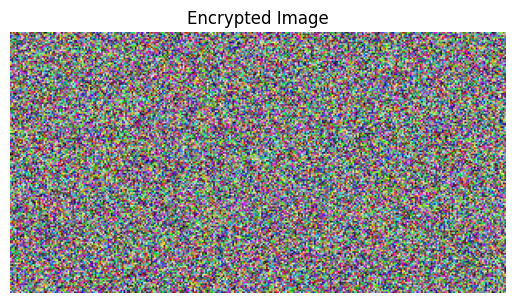

In [37]:
plt.imshow(final_encrypted_matrix,cmap='gray')
plt.title('Encrypted Image')
plt.axis('off')
plt.show()

In [38]:
print(final_encrypted_matrix)

[[[134  33  21]
  [183 165 104]
  [191  26  11]
  ...
  [197 233  35]
  [ 79 119 197]
  [160 213 126]]

 [[106 132 180]
  [162 193  97]
  [169 159  74]
  ...
  [228 157 184]
  [236 208 140]
  [237 171 137]]

 [[ 31  41 220]
  [107  57 246]
  [112 148  97]
  ...
  [ 90  42  55]
  [152  99  18]
  [137 135 192]]

 ...

 [[183  26  72]
  [ 16 241  21]
  [199 153  25]
  ...
  [242 176 129]
  [211 162  29]
  [131  33 122]]

 [[162 241 212]
  [ 78 108  97]
  [ 96 107 184]
  ...
  [178 174 186]
  [ 80  71 208]
  [ 10 125 187]]

 [[ 86  28 220]
  [132 180 245]
  [ 86 102  88]
  ...
  [161 246  92]
  [131 115 208]
  [204 197  36]]]


In [39]:
encoding_rules = {
    '00': 'A',
    '11': 'U',
    '01': 'C',
    '10': 'G'
}

# Assuming 'encrypted_matrix' is your matrix with shape (163, 310, 8)

# Initialize a 3D array to store the decoded RNA sequence
encoded_rna_matrix = np.empty((encrypted_matrix.shape[0], encrypted_matrix.shape[1], encrypted_matrix_shape[2], encrypted_matrix.shape[3]//2), dtype='U1')

# Iterate through the 3D array
for i in range(encrypted_matrix.shape[0]):
    for j in range(encrypted_matrix.shape[1]):
         for c in range(encrypted_matrix.shape[2]):
          # Pair 2-bits and apply decoding rules
           bit_pairs = ''.join(map(str, encrypted_matrix[i, j, c, :]))
           encoded_rna_matrix[i, j, c, :] = [encoding_rules[bit_pairs[k:k+2]] for k in range(0, len(bit_pairs), 2)]

# Now 'decoded_rna_matrix' should contain the decoded RNA bases
print("Decoded rna matrix:",encoded_rna_matrix)
print("Shape of the 3D array:", encoded_rna_matrix.shape)

Decoded rna matrix: [[[['G' 'A' 'C' 'G']
   ['A' 'G' 'A' 'C']
   ['A' 'C' 'C' 'C']]

  [['G' 'U' 'C' 'U']
   ['G' 'G' 'C' 'C']
   ['C' 'G' 'G' 'A']]

  [['G' 'U' 'U' 'U']
   ['A' 'C' 'G' 'G']
   ['A' 'A' 'G' 'U']]

  ...

  [['U' 'A' 'C' 'C']
   ['U' 'G' 'G' 'C']
   ['A' 'G' 'A' 'U']]

  [['C' 'A' 'U' 'U']
   ['C' 'U' 'C' 'U']
   ['U' 'A' 'C' 'C']]

  [['G' 'G' 'A' 'A']
   ['U' 'C' 'C' 'C']
   ['C' 'U' 'U' 'G']]]


 [[['C' 'G' 'G' 'G']
   ['G' 'A' 'C' 'A']
   ['G' 'U' 'C' 'A']]

  [['G' 'G' 'A' 'G']
   ['U' 'A' 'A' 'C']
   ['C' 'G' 'A' 'C']]

  [['G' 'G' 'G' 'C']
   ['G' 'C' 'U' 'U']
   ['C' 'A' 'G' 'G']]

  ...

  [['U' 'G' 'C' 'A']
   ['G' 'C' 'U' 'C']
   ['G' 'U' 'G' 'A']]

  [['U' 'G' 'U' 'A']
   ['U' 'C' 'A' 'A']
   ['G' 'A' 'U' 'A']]

  [['U' 'G' 'U' 'C']
   ['G' 'G' 'G' 'U']
   ['G' 'A' 'G' 'C']]]


 [[['A' 'C' 'U' 'U']
   ['A' 'G' 'G' 'C']
   ['U' 'C' 'U' 'A']]

  [['C' 'G' 'G' 'U']
   ['A' 'U' 'G' 'C']
   ['U' 'U' 'C' 'G']]

  [['C' 'U' 'A' 'A']
   ['G' 'C' 'C' 'A']
   ['C' 'G

In [40]:
encoded_array = rna_encoding(np.array(Z),rna_translation_matrix,u)
print("Encoding matrix: ")
print(encoded_array)
print(encoded_array.shape)

Encoding matrix: 
[[[['U' 'U' 'G' 'G']
   ['C' 'C' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  [['U' 'U' 'G' 'G']
   ['G' 'G' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  [['C' 'C' 'G' 'G']
   ['A' 'A' 'A' 'A']
   ['U' 'U' 'U' 'U']]

  ...

  [['A' 'A' 'U' 'U']
   ['G' 'G' 'C' 'C']
   ['A' 'A' 'A' 'A']]

  [['C' 'C' 'A' 'A']
   ['U' 'U' 'G' 'G']
   ['C' 'C' 'A' 'A']]

  [['A' 'A' 'U' 'U']
   ['A' 'A' 'C' 'C']
   ['U' 'U' 'G' 'G']]]


 [[['U' 'U' 'G' 'G']
   ['U' 'U' 'G' 'G']
   ['U' 'U' 'A' 'A']]

  [['C' 'C' 'U' 'U']
   ['C' 'C' 'G' 'G']
   ['A' 'A' 'U' 'U']]

  [['G' 'G' 'A' 'A']
   ['C' 'C' 'C' 'C']
   ['C' 'C' 'G' 'G']]

  ...

  [['U' 'U' 'G' 'G']
   ['A' 'A' 'U' 'U']
   ['G' 'G' 'G' 'G']]

  [['A' 'A' 'G' 'G']
   ['G' 'G' 'C' 'C']
   ['U' 'U' 'U' 'U']]

  [['C' 'C' 'C' 'C']
   ['C' 'C' 'U' 'U']
   ['A' 'A' 'A' 'A']]]


 [[['G' 'G' 'G' 'G']
   ['A' 'A' 'A' 'A']
   ['C' 'C' 'A' 'A']]

  [['U' 'U' 'A' 'A']
   ['C' 'C' 'C' 'C']
   ['U' 'U' 'U' 'U']]

  [['U' 'U' 'U' 'U']
   ['C' 'C' 'C' 'C']
   ['A' 'A' 

In [41]:
# XOR Truth Table for RNA computing
xor_truth_table = {
    'A': {'A': 'A', 'U': 'U', 'C': 'C', 'G': 'G'},
    'U': {'A': 'U', 'U': 'A', 'C': 'G', 'G': 'C'},
    'C': {'A': 'C', 'U': 'G', 'C': 'A', 'G': 'U'},
    'G': {'A': 'G', 'U': 'C', 'C': 'U', 'G': 'A'}
}

def rna_computing_reverse(encoded_array, p11):
# Assuming the first value of P10 is the same as the encoded array
    P10 = np.zeros_like(p11, dtype=np.object_)
    P10[0] = encoded_array[0]

    u = P10.shape[0]

    for j in range(0, u):
        # Vectorized XOR operation using the truth table
        P10[j] = np.vectorize(lambda x, y: xor_truth_table[x][y])(encoded_array[j], p11[j])

    return P10

In [42]:
decoded_rna_computing_matrix = rna_computing_reverse(encoded_array,encoded_rna_matrix)
print("Decoded RNA Computing Matrix:")
print(decoded_rna_computing_matrix)
print("Shape of the 3D array:", decoded_rna_computing_matrix.shape)

Decoded RNA Computing Matrix:
[[[['C' 'U' 'U' 'A']
   ['C' 'U' 'C' 'A']
   ['C' 'A' 'U' 'U']]

  [['C' 'A' 'U' 'C']
   ['A' 'A' 'A' 'A']
   ['A' 'U' 'A' 'G']]

  [['U' 'G' 'C' 'C']
   ['A' 'C' 'G' 'G']
   ['U' 'U' 'C' 'A']]

  ...

  [['U' 'A' 'G' 'G']
   ['C' 'A' 'U' 'A']
   ['A' 'G' 'A' 'U']]

  [['A' 'C' 'U' 'U']
   ['G' 'A' 'U' 'C']
   ['G' 'C' 'C' 'C']]

  [['G' 'G' 'U' 'U']
   ['U' 'C' 'A' 'A']
   ['G' 'A' 'C' 'A']]]


 [[['G' 'C' 'A' 'A']
   ['C' 'U' 'U' 'G']
   ['C' 'A' 'C' 'A']]

  [['U' 'U' 'U' 'C']
   ['G' 'C' 'G' 'U']
   ['C' 'G' 'U' 'G']]

  [['A' 'A' 'G' 'C']
   ['U' 'A' 'G' 'G']
   ['A' 'C' 'A' 'A']]

  ...

  [['A' 'C' 'U' 'G']
   ['G' 'C' 'A' 'G']
   ['A' 'C' 'A' 'G']]

  [['U' 'G' 'C' 'G']
   ['C' 'U' 'C' 'C']
   ['C' 'U' 'A' 'U']]

  [['G' 'U' 'G' 'A']
   ['U' 'U' 'C' 'A']
   ['G' 'A' 'G' 'C']]]


 [[['G' 'U' 'C' 'C']
   ['A' 'G' 'G' 'C']
   ['G' 'A' 'U' 'A']]

  [['G' 'C' 'G' 'U']
   ['C' 'G' 'U' 'A']
   ['A' 'A' 'G' 'C']]

  [['G' 'A' 'U' 'U']
   ['U' 'A' 'A' 'C']


In [43]:
def reverse_rna_translation(p11):
    reverse_translation_rules = {
        'U': 'A',
        'A': 'U',
        'G': 'C',
        'C': 'G'
    }

    # Use vectorized operations for efficient reverse translation
    reverse_translation_func = np.vectorize(lambda base: reverse_translation_rules[base])
    p10 = reverse_translation_func(p11)

    return p10

In [44]:
# Assuming 'p11' is our decoded RNA computing matrix
reversed_rna_translated_matrix = reverse_rna_translation(decoded_rna_computing_matrix)

# Print the reversed RNA translated matrix
print("Reversed RNA Translated Matrix:")
print(reversed_rna_translated_matrix)
print("Shape of the 3D array:", reversed_rna_translated_matrix.shape)

Reversed RNA Translated Matrix:
[[[['G' 'A' 'A' 'U']
   ['G' 'A' 'G' 'U']
   ['G' 'U' 'A' 'A']]

  [['G' 'U' 'A' 'G']
   ['U' 'U' 'U' 'U']
   ['U' 'A' 'U' 'C']]

  [['A' 'C' 'G' 'G']
   ['U' 'G' 'C' 'C']
   ['A' 'A' 'G' 'U']]

  ...

  [['A' 'U' 'C' 'C']
   ['G' 'U' 'A' 'U']
   ['U' 'C' 'U' 'A']]

  [['U' 'G' 'A' 'A']
   ['C' 'U' 'A' 'G']
   ['C' 'G' 'G' 'G']]

  [['C' 'C' 'A' 'A']
   ['A' 'G' 'U' 'U']
   ['C' 'U' 'G' 'U']]]


 [[['C' 'G' 'U' 'U']
   ['G' 'A' 'A' 'C']
   ['G' 'U' 'G' 'U']]

  [['A' 'A' 'A' 'G']
   ['C' 'G' 'C' 'A']
   ['G' 'C' 'A' 'C']]

  [['U' 'U' 'C' 'G']
   ['A' 'U' 'C' 'C']
   ['U' 'G' 'U' 'U']]

  ...

  [['U' 'G' 'A' 'C']
   ['C' 'G' 'U' 'C']
   ['U' 'G' 'U' 'C']]

  [['A' 'C' 'G' 'C']
   ['G' 'A' 'G' 'G']
   ['G' 'A' 'U' 'A']]

  [['C' 'A' 'C' 'U']
   ['A' 'A' 'G' 'U']
   ['C' 'U' 'C' 'G']]]


 [[['C' 'A' 'G' 'G']
   ['U' 'C' 'C' 'G']
   ['C' 'U' 'A' 'U']]

  [['C' 'G' 'C' 'A']
   ['G' 'C' 'A' 'U']
   ['U' 'U' 'C' 'G']]

  [['C' 'U' 'A' 'A']
   ['A' 'U' 'U' 'G'

In [45]:
def reverse_mutation_rules():
    return {
        0: {'A': 'A', 'U': 'U', 'G': 'G', 'C': 'C'},
        1: {'A': 'U', 'U': 'A', 'G': 'C', 'C': 'G'},
        2: {'A': 'G', 'U': 'C', 'G': 'A', 'C': 'U'},
        3: {'A': 'C', 'U': 'G', 'G': 'U', 'C': 'A'}
    }

def reverse_rna_mutation(p10, Y):
    u, v, channels, w = p10.shape
    # Reshape Y to match the shape of p10
    Y_reshaped = Y.reshape((u, v, channels, w))

    # Convert Y2 to integer Y1
    Y1 = np.floor(np.mod(Y_reshaped * 10**5, 4)).astype(int)

    reverse_mutation_rules_dict = reverse_mutation_rules()

    # Use vectorized operations for efficient reverse mutation
    reverse_mutation_func = np.vectorize(lambda base, mode: reverse_mutation_rules_dict[mode].get(base, base))
    p9 = reverse_mutation_func(p10, Y1)

    return p9


In [46]:
reverse_rna_mutation_matrix = reverse_rna_mutation(reversed_rna_translated_matrix,np.array(Y))
print("Rna mutation :")
print(reverse_rna_mutation_matrix)
print(reverse_rna_mutation_matrix.shape)


Rna mutation :
[[[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  ...

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'C']
   ['A' 'U' 'U' 'G']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'C']
   ['A' 'U' 'U' 'G']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'A']
   ['A' 'U' 'U' 'C']]]


 [[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  ...

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'U']
   ['C' 'A' 'A' 'C']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'G']
   ['C' 'A' 'A' 'A']]

  [['A' 'A' 'A' 'A']
   ['A' 'A' 'G' 'G']
   ['C' 'A' 'A' 'A']]]


 [[['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C' 'A']]

  [['A' 'A' 'A' 'U']
   ['A' 'A' 'G' 'G']
   ['A' 'U' 'C'

In [47]:
reverse_transcription_table_rna_to_dna = {
    'U': 'A',
    'A': 'T',
    'G': 'C',
    'C': 'G'
}

def reverse_rna_transcription(p9):
    # Apply the reverse transcription rules using vectorization
    p8 = np.vectorize(reverse_transcription_table_rna_to_dna.get)(p9)

    return p8


In [48]:
reverse_transcription_matrix = reverse_rna_transcription(reverse_rna_mutation_matrix)
print("Reverse Transcription Matrix: ",reverse_transcription_matrix)
print("Shape of reversed transcription matrix is :",reverse_transcription_matrix.shape)

Reverse Transcription Matrix:  [[[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  ...

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'G']
   ['T' 'A' 'A' 'C']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'G']
   ['T' 'A' 'A' 'C']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'T']
   ['T' 'A' 'A' 'G']]]


 [[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  ...

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'A']
   ['G' 'T' 'T' 'G']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'C']
   ['G' 'T' 'T' 'T']]

  [['T' 'T' 'T' 'T']
   ['T' 'T' 'C' 'C']
   ['G' 'T' 'T' 'T']]]


 [[['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']
   ['T' 'A' 'G' 'T']]

  [['T' 'T' 'T' 'A']
   ['T' 'T' 'C' 'C']

In [49]:
def dna_decoding(encoded_dna, rule_index):
    decoding_rules = {
        1: {'A': '00', 'T': '11', 'C': '01', 'G': '10'},
        2: {'A': '00', 'T': '11', 'C': '10', 'G': '01'},
        3: {'A': '01', 'T': '10', 'C': '00', 'G': '11'},
        4: {'A': '01', 'T': '10', 'C': '11', 'G': '00'},
        5: {'A': '10', 'T': '01', 'C': '00', 'G': '11'},
        6: {'A': '10', 'T': '01', 'C': '11', 'G': '00'},
        7: {'A': '11', 'T': '00', 'C': '01', 'G': '10'},
        8: {'A': '11', 'T': '00', 'C': '10', 'G': '01'},
    }
    u, v, channels,  w_half = encoded_dna.shape

    decoded_dna = np.empty((u, v , channels, w_half * 2), dtype=int)
    for i in range(u):
        for j in range(v):
          for c in range(channels):
            for k in range(w_half):
                pair = encoded_dna[i, j, c, k]
                values = decoding_rules[rule_index][pair]
                decoded_dna[i, j, c, 2 * k:2 * k + 2] = [int(bit) for bit in values]

    return decoded_dna

In [50]:
rule_index=1
decoded_dna_matrix = dna_decoding(reverse_transcription_matrix,rule_index)
print("The decoded DNA matrix is: ",decoded_dna_matrix)
print("Shape of DNA decoded matrix: ",decoded_dna_matrix.shape)

The decoded DNA matrix is:  [[[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  ...

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 0]
   [1 1 0 ... 0 0 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 0]
   [1 1 0 ... 0 0 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 1 1]
   [1 1 0 ... 0 1 0]]]


 [[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  ...

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 0]
   [1 0 1 ... 1 1 0]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 1]
   [1 0 1 ... 1 1 1]]

  [[1 1 1 ... 1 1 1]
   [1 1 1 ... 1 0 1]
   [1 0 1 ... 1 1 1]]]


 [[[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
   [1 1 0 ... 0 1 1]]

  [[1 1 1 ... 1 0 0]
   [1 1 1 ... 1 0 1]
  

In [51]:
# Shuffle the binary values in the 3D matrix
reshuffled_bit_planes_3d = 1 - decoded_dna_matrix

# Print the shape of the shuffled 3D array and a small part of the array
print("Shape of the shuffled 3D array:", reshuffled_bit_planes_3d.shape)
print("Small section of the shuffled array:")
print(reshuffled_bit_planes_3d) 

Shape of the shuffled 3D array: (163, 310, 3, 8)
Small section of the shuffled array:
[[[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   [0 0 1 ... 1 1 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   [0 0 1 ... 1 1 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 1 ... 1 0 1]]]


 [[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 1]
   [0 1 0 ... 0 0 1]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 0]
   [0 1 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 1 0]
   [0 1 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1 ... 1 0 0]]

  [[0 0 0 ... 0 1 1]
   [0 0 0 ... 0 1 0]
   [0 0 1

In [52]:
def matrix_to_decimal(matrix):
    # Reshape the matrix to a 2D array
    flattened_array = matrix.reshape(-1, 8)

    # Convert each 8-bit binary value to decimal
    decimal_matrix = np.zeros((len(flattened_array),), dtype=int)
    for i, binary_value in enumerate(flattened_array):
        binary_string = ''.join(map(str, binary_value))
        decimal_matrix[i] = int(binary_string, 2)

    # Reshape the result back to the original 2D shape
    decimal_matrix = decimal_matrix.reshape(matrix.shape[:-1])

    return decimal_matrix

final_decrypted_matrix = matrix_to_decimal(reshuffled_bit_planes_3d)

# Print the shape of the decimal matrix and a small part of the matrix
print("Shape of the decimal matrix:", final_decrypted_matrix)
print("Small section of the decimal matrix:")
print(final_decrypted_matrix)


Shape of the decimal matrix: [[[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0  9 62]
  [ 0  9 62]
  [ 0  8 61]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 11 65]
  [ 0 10 64]
  [ 0 10 64]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 15 70]
  [ 0 14 69]
  [ 0 14 69]]

 ...

 [[11 32 33]
  [11 32 33]
  [12 33 34]
  ...
  [ 0 14  8]
  [ 0 15 12]
  [ 3 24 19]]

 [[12 32 31]
  [12 32 31]
  [13 33 32]
  ...
  [ 0  9  7]
  [ 0 11 10]
  [ 2 18 17]]

 [[12 32 31]
  [12 32 31]
  [13 33 32]
  ...
  [ 0  7  5]
  [ 0  9  8]
  [ 0 14 13]]]
Small section of the decimal matrix:
[[[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0  9 62]
  [ 0  9 62]
  [ 0  8 61]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 11 65]
  [ 0 10 64]
  [ 0 10 64]]

 [[ 3 10 52]
  [ 3 10 52]
  [ 3 10 52]
  ...
  [ 0 15 70]
  [ 0 14 69]
  [ 0 14 69]]

 ...

 [[11 32 33]
  [11 32 33]
  [12 33 34]
  ...
  [ 0 14  8]
  [ 0 15 12]
  [ 3 24 19]]

 [[12 32 31]
  [12 32 31]
  [13 33 32]
  ...
  [ 0  9  7]
  [ 

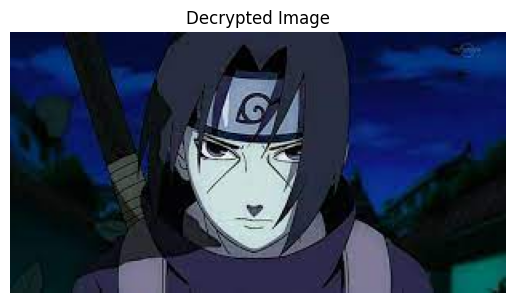

In [53]:
plt.imshow(final_decrypted_matrix,cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()